<a href="https://colab.research.google.com/github/nwaeze77/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
f = pd.read_excel('data.xlsx')

column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area',
                'X8': 'Glazing_Area_Distribution',
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


In [ ]:
f = f.rename(columns=column_names)

In [ ]:
#select a sample of the dataset
simple_linear_reg_f = f[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

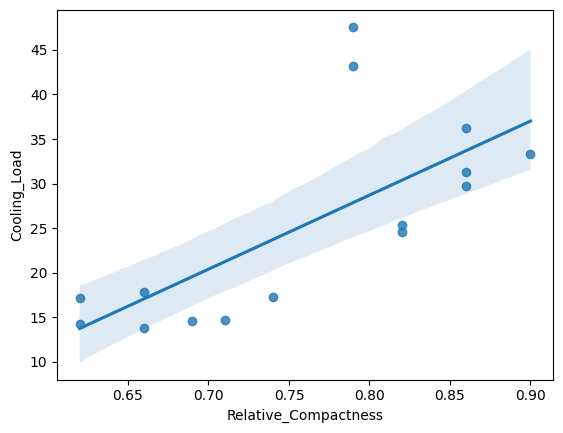

In [ ]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
data=simple_linear_reg_f)

In [ ]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_f = pd.DataFrame(scaler.fit_transform(f), columns=f.columns)
features_f = normalised_f.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_f['Heating_Load']

In [ ]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_f, heating_target,
test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063

0.063

In [ ]:
#Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) #prints 1.823

1.821

In [ ]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #prints 0.089

0.089

In [ ]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

0.894